In [39]:
import pickle
import numpy as np

numpy_array = np.random.random_sample((100,2))

with open('data.pickle','wb') as f:
    pickle.dump(numpy_array, f)

data = pickle.load(open('data.pickle', 'rb'))

In [40]:
ks = np.array(range(1,6))

In [41]:
import scipy.cluster.hierarchy as h

methods = ['average','weighted','median','complete','single'] 
labels_k_method = []

for method in methods:
  labels_k = []

  for k in ks:
    # Apply the agglomerative algorithm to obtain the hierarchy information
    tree = h.linkage(data, method=method, optimal_ordering=True)
    # Undo the last merges to retrieve at most k clusters
    labels = h.fcluster(tree, k, criterion='maxclust')
    labels_k.append(labels)

  labels_k_method.append(labels_k)

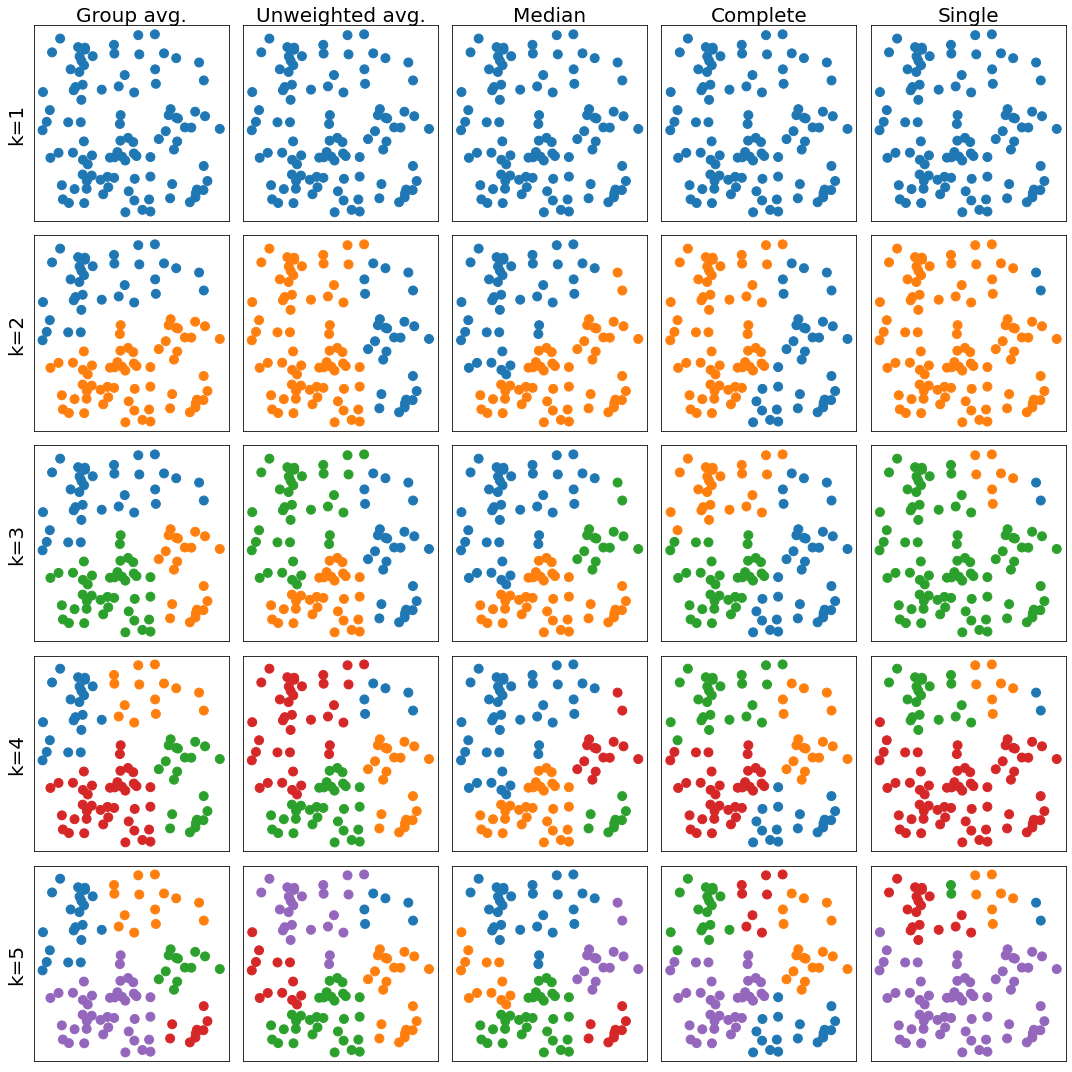

In [42]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

tdata = np.transpose(data)
fig, axs = plt.subplots(5, 5, sharex=True, sharey=True, figsize= (15,15))
axs[0,0].set_yticks([])
axs[0,0].set_xticks([])

for i, label_k in enumerate(labels_k_method): 
  for j, label_data in enumerate(label_k):
    c = [list(mcolors.TABLEAU_COLORS.values())[l-1] for l in label_data]
    axs[j, i].scatter(tdata[0], tdata[1], s=80, c=c)

xlabels = ["Group avg.","Unweighted avg.","Median","Complete","Single"]

for i, label in enumerate(xlabels):
  axs[0,i].set_xlabel(label, fontsize=20)
  axs[0,i].xaxis.set_label_position("top")
  axs[i,0].set_ylabel(f"k={i+1}", fontsize=20)

plt.tight_layout()
plt.show()